In [7]:
# Data Manipulation and Visual Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# NLP Libraries
import nltk
import re
from nltk.stem import WordNetLemmatizer
#from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


In [8]:
# ML Algorithms
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import Embedding,Dropout
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.metrics import classification_report,accuracy_score

# Types of ML Algos
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
#from xgboost import XGBClassifier
#from catboost import CatBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

In [9]:
data_set = pd.read_csv("/Users/marcus/Desktop/Y3/Y3S2/FYP/DisasterNewsDataset/data.csv")

#test_set = pd.read_csv("/Users/marcus/Desktop/Y3/Y3S2/FYP/DisasterNewsDataset/disaster_response_messages_test.csv")
data_set.head()

,headlines,outcome
0,A post claims compulsory vacination violates t...,0
1,A photo claims that this person is a doctor wh...,0
2,Post about a video claims that it is a protest...,0
3,All deaths by respiratory failure and pneumoni...,0
4,The dean of the College of Biologists of Euska...,0


In [10]:
#test_set.head()

Exploration of dataset

In [11]:
print("There are {} rows and {} columns in training data".format(data_set.shape[0],data_set.shape[1]))
#print("There are {} rows and {} columns in training data".format(test_set.shape[0],test_set.shape[1]))

There are 10201 rows and 2 columns in training data


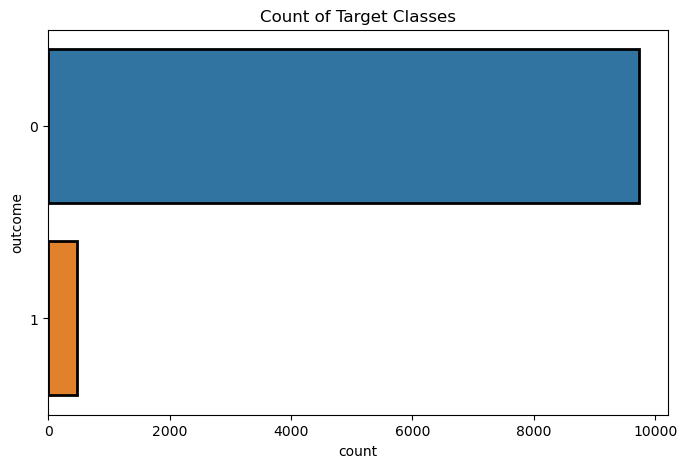

In [12]:
# Visualizing the target classes
plt.figure(figsize=(8,5))
plt.title("Count of Target Classes")
sns.countplot(y=data_set["outcome"],linewidth=2,
                   edgecolor='black')

plt.show()

In [13]:
# Get the count of '1' in the column 'outcome'
count_of_1 = data_set['outcome'].value_counts().get(1, 0)
#test_count_of_2 = test_set['related'].value_counts().get(2, 0)

print(f"Count of '1' in the column 'related': {count_of_1}")
#print(f"Count of '2' in the column 'related': {test_count_of_2}")

Count of '1' in the column 'related': 474


As you can see, there's 474 entries that have the value of '1' in the target class.

Analysis of total number of characters in the text according to Related/Non-Related to a disaster

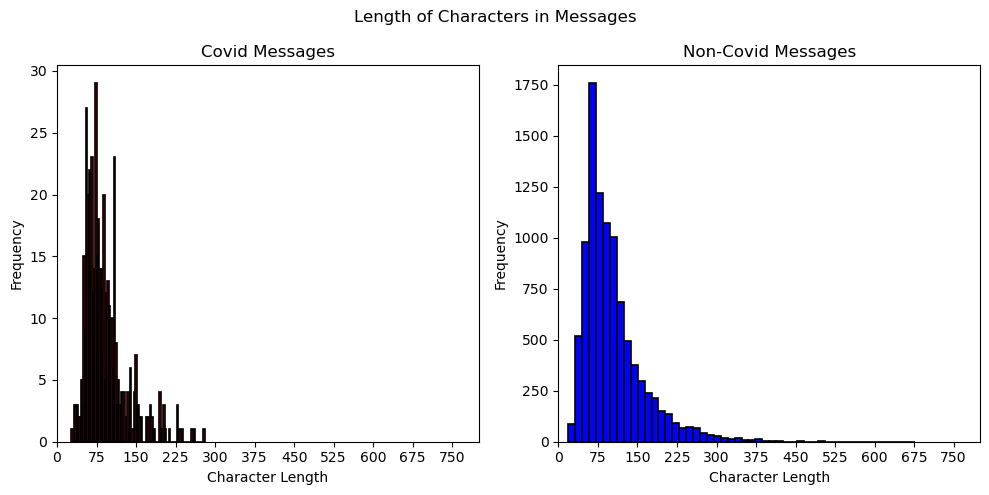

In [14]:
# Plotting the character length distributions
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Character length distribution for disaster messages (related == 1)
char_len_dis = data_set[data_set['outcome'] == 1]['headlines'].str.len()
ax1.hist(char_len_dis, bins=100, color='red', edgecolor='black', linewidth=1.2)
ax1.set_title('Covid Messages')
ax1.set_xlabel('Character Length')
ax1.set_ylabel('Frequency')
ax1.set_xlim(0, 800)
ax1.set_xticks(range(0, 801, 75))

# Character length distribution for non-disaster messages (related == 0)
char_len_ndis = data_set[data_set['outcome'] == 0]['headlines'].str.len()
ax2.hist(char_len_ndis, bins=50, color='blue', edgecolor='black', linewidth=1.2)
ax2.set_title('Non-Covid Messages')
ax2.set_xlabel('Character Length')
ax2.set_ylabel('Frequency')
ax2.set_xlim(0, 800)
ax2.set_xticks(range(0, 801, 75))

# Super title and layout adjustment
plt.suptitle("Length of Characters in Messages")
plt.tight_layout()
plt.show()

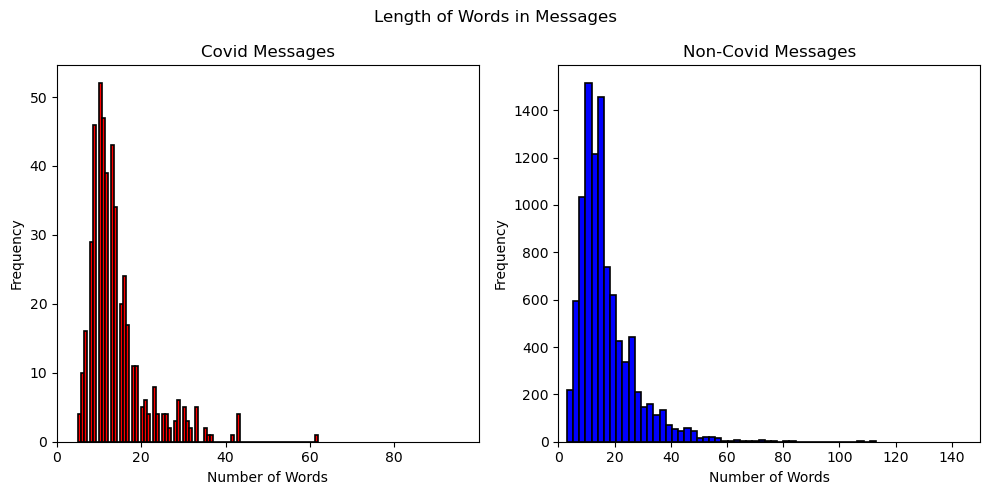

In [15]:
# Plotting the word length distributions
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Word length distribution for disaster messages (related == 1)
word_len_dis = data_set[data_set['outcome'] == 1]['headlines'].str.split().map(len)
ax1.hist(word_len_dis, bins=80, color='red', edgecolor='black', linewidth=1.2)
ax1.set_title('Covid Messages')
ax1.set_xlabel('Number of Words')
ax1.set_ylabel('Frequency')
ax1.set_xlim(0, 100)
ax1.set_xticks(range(0, 100, 20))

# Word length distribution for non-disaster messages (related == 0)
word_len_ndis = data_set[data_set['outcome'] == 0]['headlines'].str.split().map(len)
ax2.hist(word_len_ndis, bins=50, color='blue', edgecolor='black', linewidth=1.2)
ax2.set_title('Non-Covid Messages')
ax2.set_xlabel('Number of Words')
ax2.set_ylabel('Frequency')
ax2.set_xlim(0, 150)

# Super title and layout adjustment
plt.suptitle("Length of Words in Messages")
plt.tight_layout()
plt.show()

As observered from the histograms above, most of the words ranges from 5 to 60 for the Covid Messages and 5 to 60 for the Non-Covid Messages.

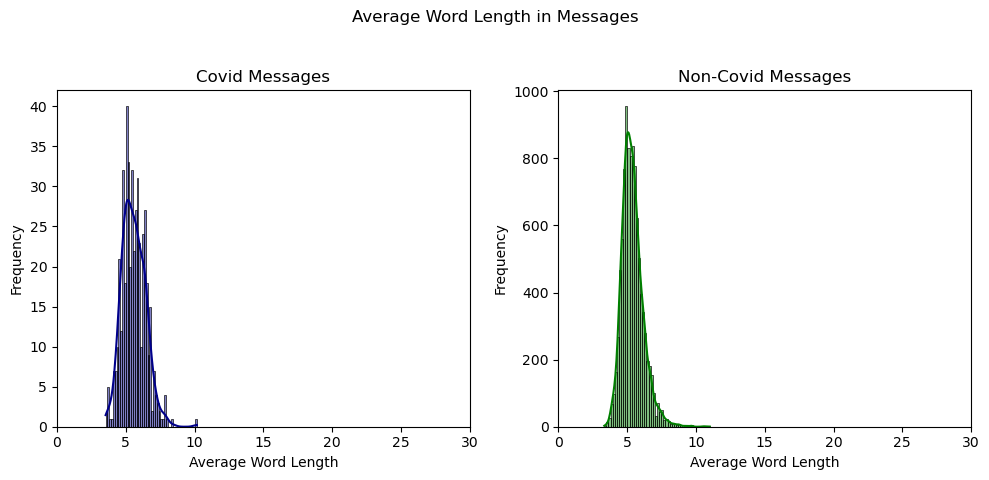

In [16]:
# Plotting the average word length distributions
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Average word length for disaster messages (related == 1)
word_len_dis = data_set[data_set['outcome'] == 1]['headlines'].str.split().apply(lambda x: [len(i) for i in x])
sns.histplot(word_len_dis.map(lambda x: np.mean(x)), ax=ax1, color='darkblue', kde=True, bins = 50)
ax1.set_title('Covid Messages')
ax1.set_xlabel('Average Word Length')
ax1.set_ylabel('Frequency')
ax1.set_xlim(0, 30)

# Average word length for non-disaster messages (related == 0)
word_len_ndis = data_set[data_set['outcome'] == 0]['headlines'].str.split().apply(lambda x: [len(i) for i in x])
sns.histplot(word_len_ndis.map(lambda x: np.mean(x)), ax=ax2, color='green', kde=True, bins = 50)
ax2.set_title('Non-Covid Messages')
ax2.set_xlabel('Average Word Length')
ax2.set_ylabel('Frequency')
ax2.set_xlim(0, 30)

# Super title and layout adjustment
plt.suptitle("Average Word Length in Messages")
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

Let's explore the data further in depth:-
Below sections perform following analysis:
- Stop Words Analysis
- Punctuations Analysis
- Analysis of Missing words.

In [17]:
# Creating sample corpus for further analysis.
def create_corpus(target):
    corpus = []
    for x in data_set[data_set['outcome']==target]['headlines'].str.split():
        for i in x:
            corpus.append(i)
    return corpus
    

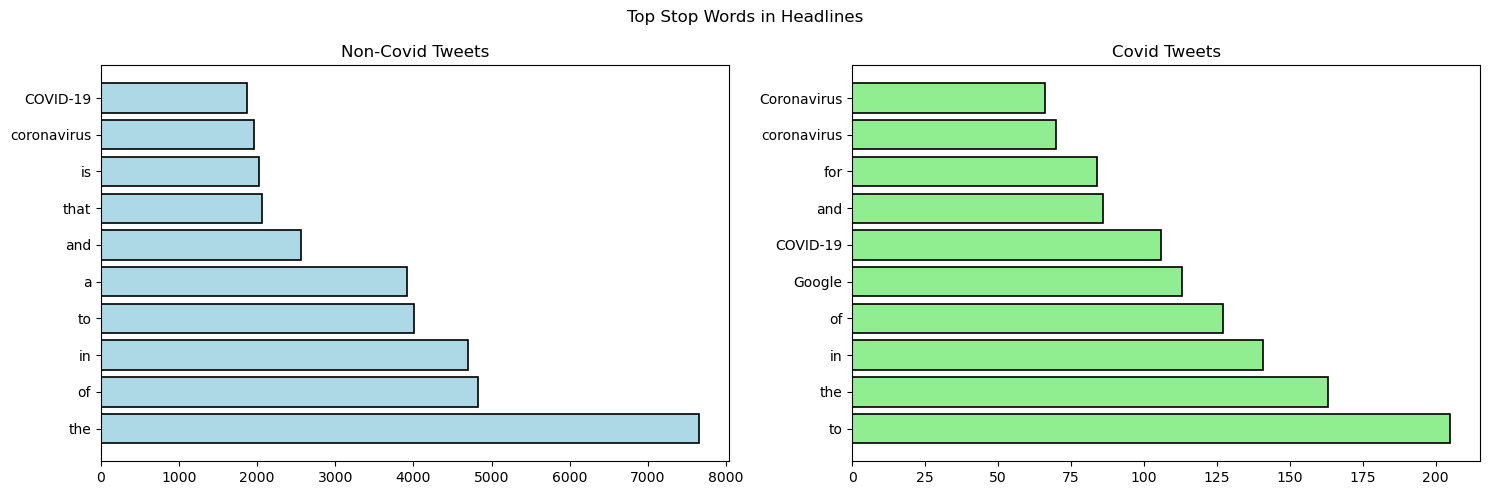

In [18]:
# Analysing top stop words in text.
from collections import defaultdict

def analyze_stopwords(data, func, target):
    values_list = []
    for labels in range(0, len(target)):
        dic = defaultdict(int)
        corpus = func(target[labels])
        for word in corpus:
            dic[word] += 1
        top = sorted(dic.items(), key=lambda x: x[1], reverse=True)[:10]
        x_items, y_values = zip(*top)
        values_list.append(x_items)
        values_list.append(y_values)

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
    ax1.barh(values_list[0],values_list[1],color="lightblue",edgecolor='black', linewidth=1.2)
    ax1.set_title("Non-Covid Tweets")
    
    ax2.barh(values_list[2],values_list[3],color="lightgreen",edgecolor='black', linewidth=1.2)
    ax2.set_title("Covid Tweets")

    plt.suptitle("Top Stop Words in Headlines")
    plt.tight_layout()
    plt.show()

analyze_stopwords(data_set, create_corpus, [0, 1])

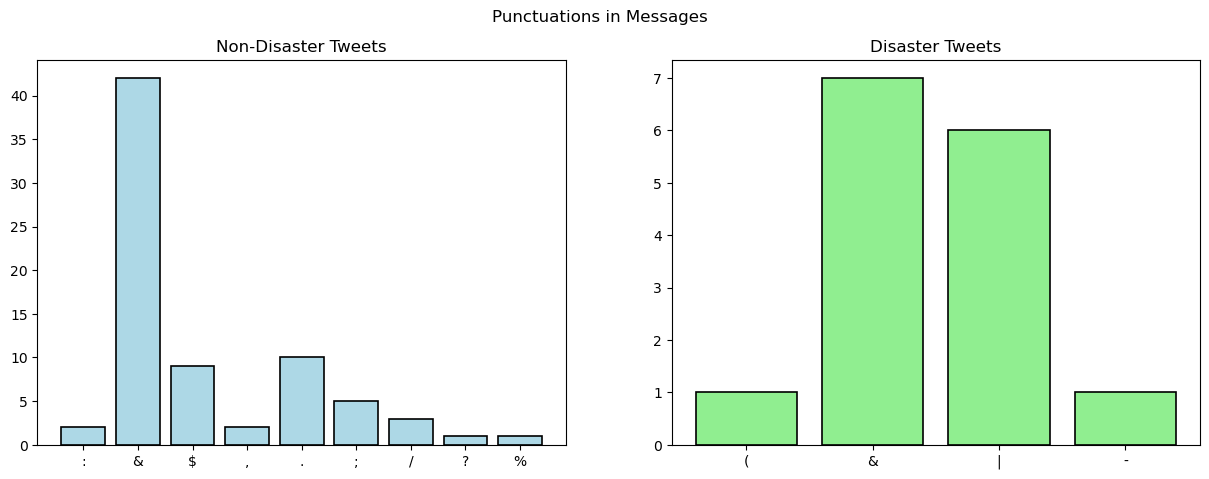

In [19]:
# Analyzing punctuations in text
import string

def analyze_punctuation(data, func, target):
    values_list = []
    special = string.punctuation
    for labels in range(len(target)):
        dic = defaultdict(int)
        corpus = func(target[labels])
        for i in corpus:
            if i in special:
                dic[i] += 1
        x_items, y_values = zip(*dic.items())
        values_list.append(x_items)
        values_list.append(y_values)

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
    ax1.bar(values_list[0],values_list[1],color="lightblue",edgecolor='black', linewidth=1.2)
    ax1.set_title("Non-Disaster Tweets")
    
    ax2.bar(values_list[2],values_list[3],color="lightgreen",edgecolor='black', linewidth=1.2)
    ax2.set_title("Disaster Tweets")

    plt.suptitle("Punctuations in Messages")
    plt.show()

analyze_punctuation(data_set, create_corpus, [0, 1])

In [20]:
data_set_missing = data_set.isnull().sum()
#missing_test = test_set2.isnull().sum()
print("missing_train:", data_set_missing)
#print("missing_test:", missing_test)

missing_train: headlines    0
outcome      0
dtype: int64


# Chapter 2: Removing the Garbage
Let's Clean the Data. Following operations are carried out on text column for performing Data Cleaning
- Removal of URL's.
- Removal of HTMl tags.
- Removal of Emoji's.
- Filtering out miscellaneous text.
- Lowering the text.
- Performing Stemming (in case of bag of words(bow) and tf-idf) and lemmatization for (LSTM).
- Discarding words of length < 2.
Note: The Stemming process is performed for bow and tf-idf because there is no need of meaningful words while lemmatization is performed for LSTM because we do require meaningful words (discussed in subsequent sections).

In [21]:
X = data_set.drop(columns = ["outcome"], axis = 1)
y = data_set["outcome"]

In [22]:
headlines_data = X.copy()
headlines_test = data_set.copy()

In [23]:
ps = PorterStemmer()
wl = WordNetLemmatizer()

def cleaning_data(data):
    review =re.sub(r'https?://\S+|www\.\S+|http?://\S+',' ',data) #removal of url
    review =re.sub(r'<.*?>',' ',review) #removal of html tags
    review = re.sub("["
                           u"\U0001F600-\U0001F64F"  # removal of emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+",' ',review)
    review = re.sub('[^a-zA-Z]',' ',review) # filtering out miscellaneous text.
    review = review.lower() # Lowering all the words in text
    review = review.split()
    review = [ps.stem(words) for words in review if words not in stopwords.words('english')] #Stemming
    review = [i for i in review if len(i)>2] # Removal of words with length<2
    review = ' '.join(review)
    return review

data_set["Cleaned_headlines"] = data_set["headlines"].apply(cleaning_data)

Taking a look at the Cleaned Data

In [24]:
data_set.head()

,headlines,outcome,Cleaned_headlines
0,A post claims compulsory vacination violates t...,0,post claim compulsori vacin violat principl bi...
1,A photo claims that this person is a doctor wh...,0,photo claim person doctor die attend mani covi...
2,Post about a video claims that it is a protest...,0,post video claim protest confin town aranda du...
3,All deaths by respiratory failure and pneumoni...,0,death respiratori failur pneumonia regist covi...
4,The dean of the College of Biologists of Euska...,0,dean colleg biologist euskadi state lot pcr fa...


Word Cloud here

Top 50 words of Covid/Non-Covid in dataset

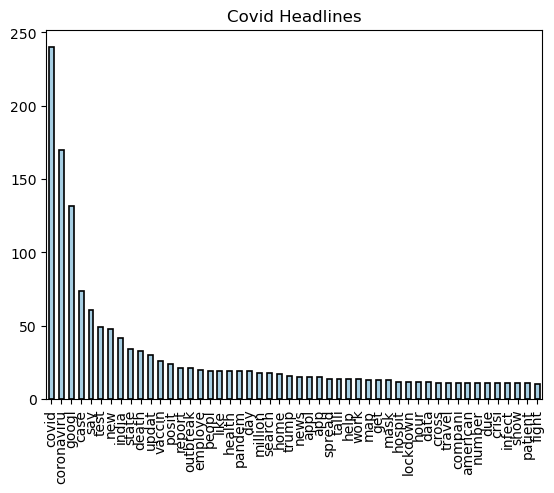

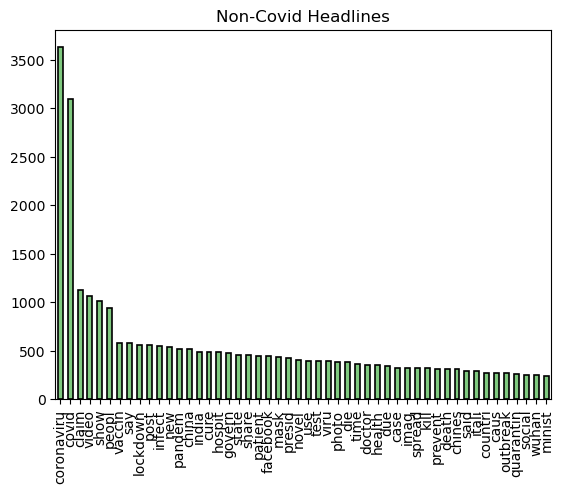

In [25]:
Covid_headlines = data_set[data_set.outcome == 1]["Cleaned_headlines"]
NonCovid_headlines = data_set[data_set.outcome == 0]["Cleaned_headlines"]

colour = ['Paired', 'Accent']
splitedData = [Covid_headlines, NonCovid_headlines]
title = ["Covid Headlines", "Non-Covid Headlines"]
for item in range(2):
    plt.title(title[item],fontsize=12)
    pd.Series(' '.join([i for i in splitedData[item]]).split()).value_counts().head(50).plot(kind='bar',fontsize=10,colormap=colour[item],edgecolor='black', linewidth=1.2)
    plt.show()

In [26]:
common_words = ['via','like','build','get','would','one','two','feel','lol','fuck','take','way','may','first','latest'
                'want','make','back','see','know','let','look','come','got','still','say','think','great','pleas','amp']

def text_cleaning(data):
    return ' '.join(i for i in data.split() if i not in common_words)

data_set["Cleaned_headlines"] = data_set["Cleaned_headlines"].apply(text_cleaning)

In [27]:
data_set.head()

,headlines,outcome,Cleaned_headlines
0,A post claims compulsory vacination violates t...,0,post claim compulsori vacin violat principl bi...
1,A photo claims that this person is a doctor wh...,0,photo claim person doctor die attend mani covi...
2,Post about a video claims that it is a protest...,0,post video claim protest confin town aranda du...
3,All deaths by respiratory failure and pneumoni...,0,death respiratori failur pneumonia regist covi...
4,The dean of the College of Biologists of Euska...,0,dean colleg biologist euskadi state lot pcr fa...


Performing BOW, TF-IDF and Word Embbedding using Glove Vectors
- To transform the data into numerical format to input into the prediction models

In [28]:
# Creating function for analysing top n grams

def top_ngrams(data,n,grams):
    '''
    Input:- Data: Input Data
            n   : Number of top n-words
            grams:Type of N-grams. 1-> Unigram  2-> Bigram  3->Trigram
            
    Output: Word Frequency of top  n words
    
    '''
    if grams == 1:
        count_vec = CountVectorizer(ngram_range=(1,1)).fit(data)
        bow = count_vec.transform(data)
        add_words = bow.sum(axis=0)
        word_freq = [(word, add_words[0, idx]) for word, idx in count_vec.vocabulary_.items()]
        word_freq = sorted(word_freq, key = lambda x: x[1], reverse=True)
    elif grams == 2:
        count_vec = CountVectorizer(ngram_range=(2,2)).fit(data)
        bow = count_vec.transform(data)
        add_words = bow.sum(axis=0)
        word_freq = [(word,add_words[0,idx]) for word,idx in count_vec.vocabulary_.items()]
        word_freq = sorted(word_freq, key = lambda x: x[1], reverse=True)
    elif grams == 3:
        count_vec = CountVectorizer(ngram_range=(3,3)).fit(data)
        bow = count_vec.transform(data)
        add_words = bow.sum(axis=0)
        word_freq = [(word,add_words[0,idx]) for word,idx in count_vec.vocabulary_.items()]
        word_freq = sorted(word_freq, key = lambda x: x[1], reverse=True)

    return word_freq[:n]

Top 10 N-grams

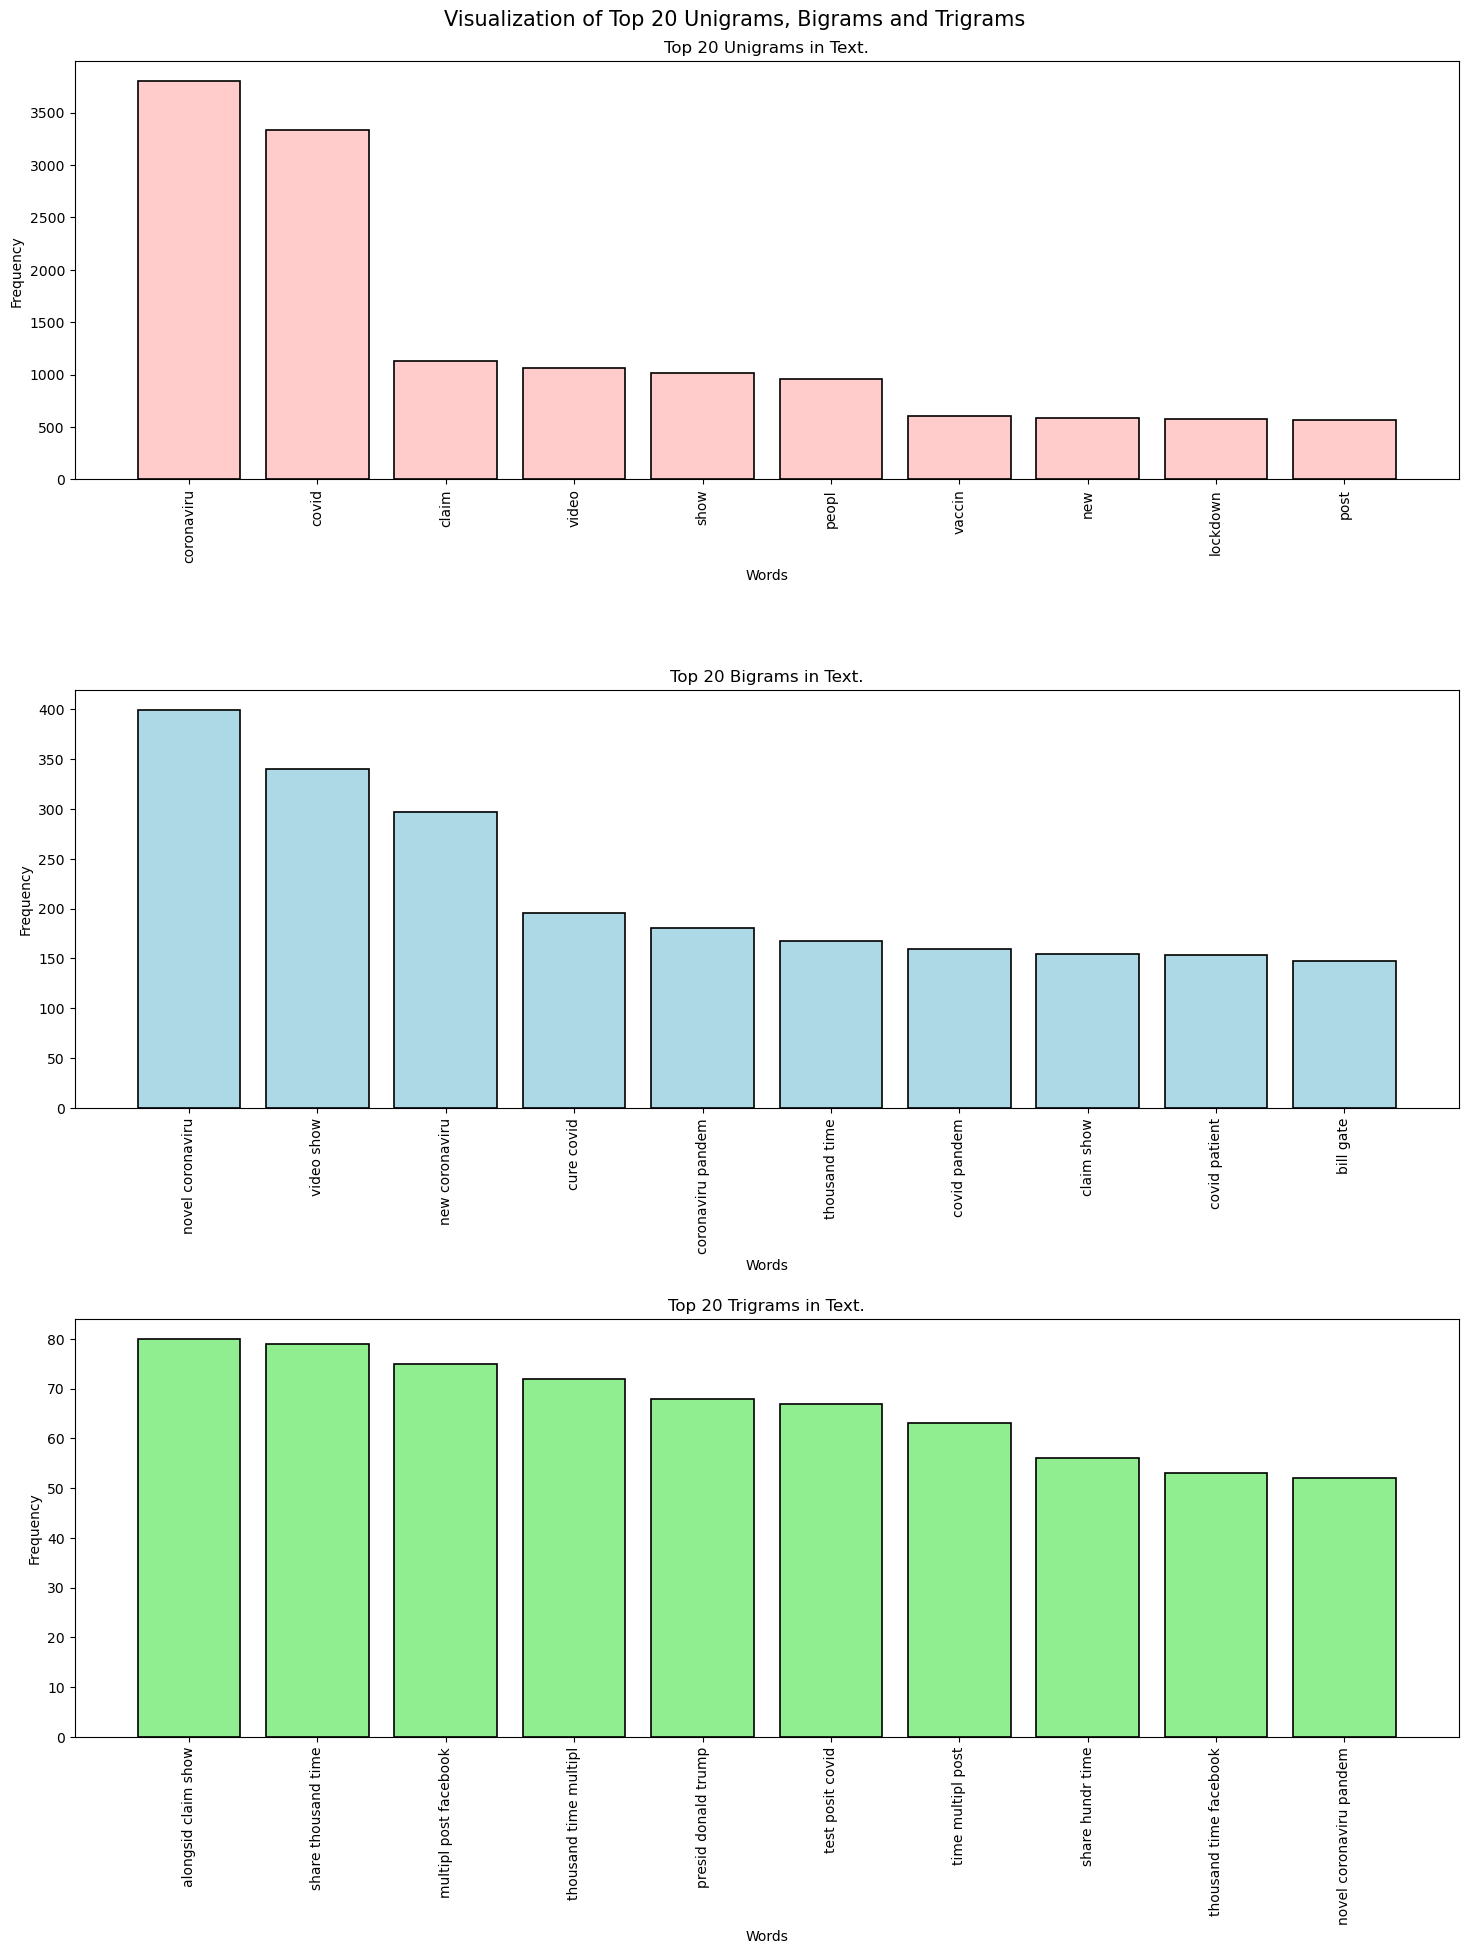

In [29]:
common_words_uni = top_ngrams(data_set["Cleaned_headlines"],10,1)
common_words_bi = top_ngrams(data_set["Cleaned_headlines"],10,2)
common_words_tri = top_ngrams(data_set["Cleaned_headlines"],10,3)
common_words_uni_df = pd.DataFrame(common_words_uni,columns=['word','freq'])
common_words_bi_df = pd.DataFrame(common_words_bi,columns=['word','freq'])
common_words_tri_df = pd.DataFrame(common_words_tri,columns=['word','freq'])
fig,(ax1,ax2,ax3) = plt.subplots(3,1,figsize=(15,20))
ax1.bar(common_words_uni_df["word"],common_words_uni_df["freq"],color="#FFCCCB",edgecolor='black', linewidth=1.2)
ax1.set_title("Top 20 Unigrams in Text.")
ax1.set_xlabel("Words")
ax1.set_ylabel("Frequency")
ax1.set_xticklabels(rotation=90,labels=common_words_uni_df["word"],fontsize=10)    

ax2.bar(common_words_bi_df["word"],common_words_bi_df["freq"],color="lightblue",edgecolor='black', linewidth=1.2)
ax2.set_title("Top 20 Bigrams in Text.")
ax2.set_xlabel("Words")
ax2.set_ylabel("Frequency")
ax2.set_xticklabels(rotation=90,labels=common_words_bi_df["word"],fontsize=10)    

ax3.bar(common_words_tri_df["word"],common_words_tri_df["freq"] ,color="lightgreen",edgecolor='black', linewidth=1.2)
ax3.set_title("Top 20 Trigrams in Text.")
ax3.set_xlabel("Words")
ax3.set_ylabel("Frequency")
ax3.set_xticklabels(rotation=90,labels=common_words_tri_df["word"],fontsize=10) 
plt.suptitle("Visualization of Top 20 Unigrams, Bigrams and Trigrams",fontsize="15")
plt.tight_layout(pad=1.85)
plt.show()

Performing data encoding using tf-idf and bow

In [30]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

def encoding(data_set, bow=True, tf_idf=False):
    '''
    Input : Data to be encoded and choice of encoding.
    Output : Desired Encoding DataFrame.
    '''
    if bow: 
        cv = CountVectorizer(ngram_range=(1, 1))
        cv_df_data_set = cv.fit_transform(data_set).toarray()
        data_set_df = pd.DataFrame(cv_df_data_set, columns=cv.get_feature_names_out())
        
    elif tf_idf:
        tfidf = TfidfVectorizer(ngram_range=(1, 1), use_idf=1, smooth_idf=1, sublinear_tf=1)
        tf_df_data_set = tfidf.fit_transform(data_set).toarray()
        data_set_df = pd.DataFrame(tf_df_data_set, columns=tfidf.get_feature_names_out())
        
    return data_set_df

cv = CountVectorizer(ngram_range=(1, 1))
#x_final = cv.fit_transform(data_set["Cleaned_headlines"]).toarray()
x_final = encoding(data_set["Cleaned_headlines"], bow=True, tf_idf=False)
y_final = np.array(y) #Converts y to an array

# Save the trained vectorizer for later use
import pickle
with open('vectorizer.pkl', 'wb') as f:
    pickle.dump(cv, f)
    
print(x_final[:5])

   aaj  aajtak  aamir  aata  ababa  abandon  abasc  abat  abba  abbasi  ...  \
0    0       0      0     0      0        0      0     0     0       0  ...   
1    0       0      0     0      0        0      0     0     0       0  ...   
2    0       0      0     0      0        0      0     0     0       0  ...   
3    0       0      0     0      0        0      0     0     0       0  ...   
4    0       0      0     0      0        0      0     0     0       0  ...   

   zloti  zombi  zone  zoo  zookeep  zoolog  zoom  zoran  zpac  zyphr  
0      0      0     0    0        0       0     0      0     0      0  
1      0      0     0    0        0       0     0      0     0      0  
2      0      0     0    0        0       0     0      0     0      0  
3      0      0     0    0        0       0     0      0     0      0  
4      0      0     0    0        0       0     0      0     0      0  

[5 rows x 7957 columns]


In [31]:
x_final.shape, y_final.shape

((10201, 7957), (10201,))

Using Word Embedding for Encoding

In [32]:
#Converting to list
headlines_text = data_set["Cleaned_headlines"].tolist()
headlines_text[:3] # Analysing first 3 sentence in train data.

['post claim compulsori vacin violat principl bioethic coronaviru exist pcr test return mani fals posit influenza vaccin relat covid',
 'photo claim person doctor die attend mani covid patin hospit bueno air',
 'post video claim protest confin town aranda duero burgo']

Initialise a Tokenizer to read all the words in the text

In [33]:
from tensorflow.keras.preprocessing.text import Tokenizer
token = Tokenizer()
token.fit_on_texts(headlines_text)

In [34]:
# Finding the vocab size
vocab_size = len(token.word_index)+1
print("The vocabulary size is : {}".format(vocab_size))

The vocabulary size is : 7958


In [35]:
# Encoding tokens in words to numerical formats
encoded_text = token.texts_to_sequences(headlines_text)
encoded_text[:2]

[[10,
  3,
  1401,
  4939,
  193,
  3022,
  4940,
  1,
  418,
  736,
  23,
  546,
  299,
  124,
  59,
  1052,
  7,
  239,
  2],
 [30, 3, 97, 33, 29, 904, 299, 2, 4941, 15, 940, 108]]

In [36]:
#Considering 120 words
max_length = 120 # top 120 tokens.
X = pad_sequences(encoded_text,maxlen=max_length,padding='post') # This is done to make the sequence of same length.

In [37]:
%%time
#declaring dict to store all the words as keys in the dictionary and their vector representations as values
glove_vectors = dict()

# Now, we will convert the words in glove vectors into key value pairs. We have used glove representation of 200D. 


file = open('/Users/marcus/Desktop/Y3/Y3S2/FYP/DisasterNewsDataset/glove.6B.200d.txt',encoding='utf-8')

for line in file:
    values = line.split()  # contains list of keys and their vectors
    word = values[0] # contains words
    vectors = np.asarray(values[1:]) # storing vectors
    glove_vectors[word] = vectors #storing the vector representation of the respective word in the dictionary
file.close()

CPU times: user 10.1 s, sys: 516 ms, total: 10.6 s
Wall time: 11.1 s


In [38]:
# Checking length of glove vectors
print("The maximum size of global vectors is : {}".format(len(glove_vectors)))

The maximum size of global vectors is : 400000


In [39]:
# Checking dimensions of Glove Vectors.
glove_vectors.get('you').shape

(200,)

In [40]:
# Now we are creating a matrix for the tokens which we are having in our dataset and then storing their vector representation values in the matrix if it matches with glove_vectors words else print the misspelled words or words which are not present.

word_vector_matrix = np.zeros((vocab_size,200))  # size of the word matrix
for word,index in token.word_index.items():
    vector = glove_vectors.get(word)
    if vector is not None:
        word_vector_matrix[index] = vector

In [41]:
print("The Size of Word Matrix is :{}".format(word_vector_matrix.shape))

The Size of Word Matrix is :(7958, 200)


Splitting of dataset

In [42]:
from sklearn.model_selection import train_test_split
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

Creating Models

1. Logistic Regression

In [43]:
logistic_reg_model = LogisticRegression(C=1.0)
logistic_reg_model.fit(X_train,y_train)
pred_1 = logistic_reg_model.predict(X_test)
model_report1 = classification_report(y_test,pred_1)
print(model_report1)

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1453
           1       0.00      0.00      0.00        78

    accuracy                           0.95      1531
   macro avg       0.47      0.50      0.49      1531
weighted avg       0.90      0.95      0.92      1531



2. Naive Bayes (NBC)

In [44]:
NBC_model = MultinomialNB(alpha=0.5)
NBC_model.fit(X_train,y_train)
pred_2 = NBC_model.predict(X_test)
model_report2 = classification_report(y_test,pred_2)
print(model_report2)

              precision    recall  f1-score   support

           0       0.97      0.29      0.44      1453
           1       0.06      0.81      0.11        78

    accuracy                           0.32      1531
   macro avg       0.51      0.55      0.28      1531
weighted avg       0.92      0.32      0.43      1531



3.Decision Tree

In [45]:
DT_model = DecisionTreeClassifier()
DT_model.fit(X_train,y_train)
pred_3 = DT_model.predict(X_test)
model_report3 = classification_report(y_test,pred_3)
print(model_report3)

              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1453
           1       0.30      0.31      0.31        78

    accuracy                           0.93      1531
   macro avg       0.63      0.63      0.63      1531
weighted avg       0.93      0.93      0.93      1531



4. Long Short Term Memory (LSTM)

In [46]:
from keras.optimizers import Adam,SGD
from tensorflow.keras.layers import LSTM,Bidirectional,GRU,MaxPooling1D,Conv1D
from tensorflow.keras import regularizers

embedding_feature_vector = 200 # Since we used glove vector embedding of dim 200.
LSTM_model = Sequential()
LSTM_model.add(Embedding(vocab_size,embedding_feature_vector,input_length=max_length,weights = [word_vector_matrix], trainable = False))
LSTM_model.add(Dropout(0.35))
LSTM_model.add(LSTM(200))
LSTM_model.add(Dropout(0.35))
LSTM_model.add(Dense(32,activation='relu'))
LSTM_model.add(Dense(1,activation='sigmoid'))
LSTM_model.compile(loss='binary_crossentropy',optimizer=Adam(lr=1e-4),metrics=['accuracy'])
print(LSTM_model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 120, 200)          1591600   
                                                                 
 dropout (Dropout)           (None, 120, 200)          0         
                                                                 
 lstm (LSTM)                 (None, 200)               320800    
                                                                 
 dropout_1 (Dropout)         (None, 200)               0         
                                                                 
 dense (Dense)               (None, 32)                6432      
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1,918,865
Trainable params: 327,265
Non-tr

2024-09-06 15:23:19.480579: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-09-06 15:23:19.481419: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-09-06 15:23:19.481830: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

In [47]:
from tensorflow.keras.callbacks import *
n_epoch = 30

early_stop = EarlyStopping(monitor='val_loss', patience=5, verbose=1, 
                           mode='min', restore_best_weights=True)

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, 
                              verbose=1, mode='min')

In [48]:
# Training the model
history = LSTM_model.fit(X_train,y_train,validation_data=(X_val,y_val),callbacks=[reduce_lr,early_stop],epochs=n_epoch,batch_size= 64)

Epoch 1/30


2024-09-06 15:23:19.572504: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2024-09-06 15:23:19.790156: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-09-06 15:23:19.790665: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-09-06 15:23:19.791266: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG IN

112/112 [==============================] - ETA: 0s - loss: 0.3554 - accuracy: 0.9545

2024-09-06 15:23:37.452041: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-09-06 15:23:37.452594: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-09-06 15:23:37.453205: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

112/112 [==============================] - 19s 165ms/step - loss: 0.3554 - accuracy: 0.9545 - val_loss: 0.1886 - val_accuracy: 0.9536 - lr: 1.0000e-04
Epoch 2/30
112/112 [==============================] - 18s 159ms/step - loss: 0.1880 - accuracy: 0.9545 - val_loss: 0.1876 - val_accuracy: 0.9536 - lr: 1.0000e-04
Epoch 3/30
112/112 [==============================] - 18s 164ms/step - loss: 0.1877 - accuracy: 0.9545 - val_loss: 0.1863 - val_accuracy: 0.9542 - lr: 1.0000e-04
Epoch 4/30
112/112 [==============================] - 18s 161ms/step - loss: 0.1857 - accuracy: 0.9543 - val_loss: 0.1863 - val_accuracy: 0.9542 - lr: 1.0000e-04
Epoch 5/30
112/112 [==============================] - 19s 166ms/step - loss: 0.1825 - accuracy: 0.9542 - val_loss: 0.1907 - val_accuracy: 0.9510 - lr: 1.0000e-04
Epoch 6/30
112/112 [==============================] - 18s 162ms/step - loss: 0.1825 - accuracy: 0.9543 - val_loss: 0.1854 - val_accuracy: 0.9542 - lr: 1.0000e-04
Epoch 7/30
112/112 [===================

In [49]:
# Predict class probabilities
pred_prob = LSTM_model.predict(X_test)

# Convert probabilities to class labels (0 or 1) using a threshold of 0.5
pred_4 = (pred_prob > 0.5).astype(int)

# Generate the classification report
model_report4 = classification_report(y_test, pred_4)
print(model_report4)

 3/48 [>.............................] - ETA: 1s 

2024-09-06 15:28:55.540924: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-09-06 15:28:55.541658: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-09-06 15:28:55.542144: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

48/48 [==============================] - 2s 32ms/step
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1453
           1       0.00      0.00      0.00        78

    accuracy                           0.95      1531
   macro avg       0.47      0.50      0.49      1531
weighted avg       0.90      0.95      0.92      1531



Overall Evaluation of models

In [50]:
acc_1 = 0.95
acc_2 = 0.32
acc_3 = 0.93
acc_4 = 0.95
results = pd.DataFrame([["Logistic Regression",acc_1],["Naive Bayes",acc_2],["Decision Trees",acc_3],
                       ["LSTM",acc_4]],columns = ["Models","Accuracy Score"]).sort_values(by='Accuracy Score',ascending=False)
results.style.background_gradient(cmap='Reds')

,Models,Accuracy Score
0,Logistic Regression,0.950000
3,LSTM,0.950000
2,Decision Trees,0.930000
1,Naive Bayes,0.320000


## User-Testing 

In [51]:
def preprocess_input(text):
    # Step 1: Clean the input text
    cleaned_text = cleaning_data(text)
    cleaned_text = text_cleaning(cleaned_text)  # Remove common words if necessary

    # Step 2: Tokenize and pad the input text
    encoded_input = token.texts_to_sequences([cleaned_text])  # Tokenize the input text
    padded_input = pad_sequences(encoded_input, maxlen=max_length, padding='post')  # Pad the input to match training data
    
    return padded_input

In [59]:
def make_preds(input_text):
    # Step 1: Preprocess the input text
    processed_input = preprocess_input(input_text)

    # Step 2: Get predictions from all models
    pred_log_reg = logistic_reg_model.predict(processed_input)
    pred_nb = NBC_model.predict(processed_input)
    pred_dt = DT_model.predict(processed_input)
    pred_lstm = LSTM_model.predict(processed_input)

    # Step 3: Interpret the results (you may want to threshold the LSTM output since it gives probabilities)
    pred_lstm_binary = (pred_lstm > 0.5).astype("int32")

    # Step 4: Return the results
    return {
        "Logistic Regression Prediction": "Real" if pred_log_reg[0] == 1 else "Fake",
        "Naive Bayes Prediction": "Real" if pred_nb[0] == 1 else "Fake",
        "Decision Tree Prediction": "Real" if pred_dt[0] == 1 else "Fake",
        "LSTM Prediction": "Real" if pred_lstm_binary[0][0] == 1 else "Fake"
    }

In [53]:
headline = "covid is a fake concept"
predictions = make_preds(headline)
print(predictions)

1/1 [==============================] - 0s 13ms/step
{'Logistic Regression Prediction': 'Fake', 'Naive Bayes Prediction': 'Fake', 'Decision Tree Prediction': 'Fake', 'LSTM Prediction': 'Fake'}


In [54]:
headline2 = "I just heard first hand that a doctor who had Corona virus recovered in double quick time. He inhaled steam just as we normally would in a bowl with towel as steaming raises the temperature of lungs, throat and mouth so that if the virus is already there it gets inactive due to high temperature."
predictions2 = make_preds(headline2)
print(predictions2)

1/1 [==============================] - 0s 12ms/step
{'Logistic Regression Prediction': 'Fake', 'Naive Bayes Prediction': 'Fake', 'Decision Tree Prediction': 'Fake', 'LSTM Prediction': 'Fake'}


In [55]:
headline3 = "A new covid pandemic has started"
predictions3 = make_preds(headline3)
print(predictions3)

1/1 [==============================] - 0s 13ms/step
{'Logistic Regression Prediction': 'Fake', 'Naive Bayes Prediction': 'Real', 'Decision Tree Prediction': 'Fake', 'LSTM Prediction': 'Fake'}
